# Wine Quality Prediction with Machine Learning models

I am going to show you how to apply Scikit-learn library to predict wine quality using 3 most widely used supervised classifiers: Random Forest Classifier, Support Vector Machine Classifier and Neural Network. From the models' performance, depending on their accuracy scores, we can decide which model provides the best precision for the wine dataset.

In [72]:
#Importing required packages
import pandas as pd #dataframe setup, columns, rows
import seaborn as sns #graphic to view
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report #matrics to weigh them
from sklearn.preprocessing import StandardScaler, LabelEncoder #pre-processing, this one is most commonly used
from sklearn.model_selection import train_test_split
%matplotlib inline

In [73]:
#sLoading dataset
wine = pd.read_csv('winequality-red.csv', sep=',')

In [74]:
#View 5 rows of the data
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
#Brief observation of the data with different variables
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [76]:
#Non-null values are nice to have, no need to further cleaning up the null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [77]:
#Preprocessing Data
bins = (2, 6.5, 8)  #we create bin values
#we set 2 bins of quality, bad and goodgood. 
#we set 6.5 because we want any quality above 6.5 to be in the "good" bin
#we set 8 because we have 8 indexes for the existing 'quality' column
group_names = ['bad', 'good']
#Now, we cut out the wine quality, replacing it, current bins with bins, and label it with bad, good
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [78]:
label_quality = LabelEncoder() #convert good and bad to 1 & 0

In [79]:
wine['quality'] = label_quality.fit_transform(wine['quality'])  #fit & transform

In [80]:
#See the updated quality column after transforming
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [81]:
#We see that 217 has high quality wine
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

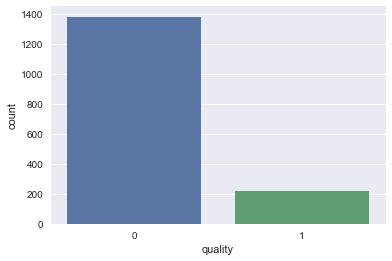

In [82]:
#Graphic_data visualization
sns.countplot(x='quality', data=wine)

In [83]:
#Now separate the dataset as response variable and feature variables
#The model takes x & y 
x = wine.drop('quality', axis=1)   #all features minus the one we looking for, in this case, dropping quality
y=wine['quality']   #the ones we looking for, for features, in this case is quality

In [84]:
#Train and Test splitting of data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
#test_size default is 25%
#random state is random seed number, default is 1

In [85]:
#This step is really important! Most models need standard scaling, normalizing
#Applying Standard scaling to get optimized result
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [86]:
#Lets see the first 10 variables
x_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

# Random Forest Classifer

In [87]:
rfc = RandomForestClassifier(n_estimators=200) #the only value you play with in random forest classifier, 200 trees
rfc.fit(x_train, y_train) #features & quality of training data
pred_rfc = rfc.predict(x_test) #prediction happens here

In [88]:
#The first predicted 20 variables for quality
pred_rfc[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [89]:
#First 20 variables for features
x_test[0:20]

array([[-0.33399129,  0.24258119, -0.96313679,  0.02140418,  0.83730066,
        -0.16962178,  0.00884052,  0.23074469, -0.44256111,  0.0634928 ,
        -0.75508835],
       [-0.27864317, -0.09492307, -0.49458376, -0.6712254 , -0.04244065,
         0.46521996,  1.72151211, -0.31812766,  0.51996419, -1.15964614,
        -0.84471308],
       [ 1.32645219,  0.86133899, -0.23427652,  0.17532186,  0.64485725,
         0.10245325, -0.35816054,  1.87736173, -0.1858877 ,  2.23796204,
        -0.48621416],
       [ 0.10879364, -0.31992591,  0.23427652, -0.17099293, -0.15240831,
         1.46282842,  0.37584158,  0.67982206,  0.13495407, -0.75193316,
        -0.57583889],
       [-0.88747245, -0.31992591, -0.13015362, -0.59426656, -0.17990022,
         0.19314493, -0.35816054, -0.91689749,  0.51996419, -0.34422018,
         0.14115895],
       [-0.61073187, -0.60117946,  0.18221507, -0.28643119, -0.01494873,
         1.73490345,  0.80400947,  0.1808472 ,  0.84080596, -0.88783749,
        -0.934

In [90]:
#Let's see hwo our model performed
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       273
          1       0.68      0.36      0.47        47

avg / total       0.87      0.88      0.87       320



In [91]:
#Put in confusion matrix
print(confusion_matrix(y_test, pred_rfc))
#265 correct, 8 wrong, mislabeled 8 bad wines_0
#30 correct, 17 wrong for good wine_1

[[265   8]
 [ 30  17]]


# SVM Classifier

In [92]:
from sklearn import svm
clf=svm.SVC()
clf.fit(x_train, y_train)
pred_clf=clf.predict(x_test)

In [93]:
#Lets see how our model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.71      0.26      0.37        47

avg / total       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


In [94]:
#SVM is better on smaller number, with raw data coming in, quick method

# Neural Network

In [95]:
#Very good with time sensitive, big data from different sources, picture processing
#Multilayer perceptron consists at least 3 layers of nodes: input layer, hidden layer and output layer
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)  
#The more hidden layer sizes you have, the more resources you are using, 11 was chosen cuz we have 11 features
mlpc.fit(x_train, y_train)
pred_mlpc = mlpc.predict(x_test)

In [96]:
#Lets see how our model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       273
          1       0.59      0.43      0.49        47

avg / total       0.86      0.87      0.86       320

[[259  14]
 [ 27  20]]


Based on the 3 model performances, they provide almost similar precisions (86-87% precision). The best model out of these 3 is Random Forest Classifier as it has the highest precision of 87%. Below, we can see the accuracy score of the random forest model:

In [97]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.88124999999999998

In [98]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [99]:
#Lets predict the quality with the following features, for 1 data point:
xnew = [[7.3, 0.58, 0, 2, 0.065, 15, 21,  0.9945, 3.36, 0.47, 10]]
xnew = sc.transform(xnew)
ynew = rfc.predict(xnew)
ynew
#The result shows this is a bad wine

array([0])